# **ARIMA MODEL**

In [ ]:
!pip install "numpy<2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.4 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [13]:
# 1. Load & parse dates
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,28-05-2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,04-06-2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,11-06-2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,18-06-2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [14]:
# Select only numeric columns before calculating the mean and filling NaNs
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# You might also want to consider filling NaN values in non-numeric columns
# with a different strategy, like a placeholder or forward/backward fill,
# depending on the nature of those columns.

display(df.head())

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


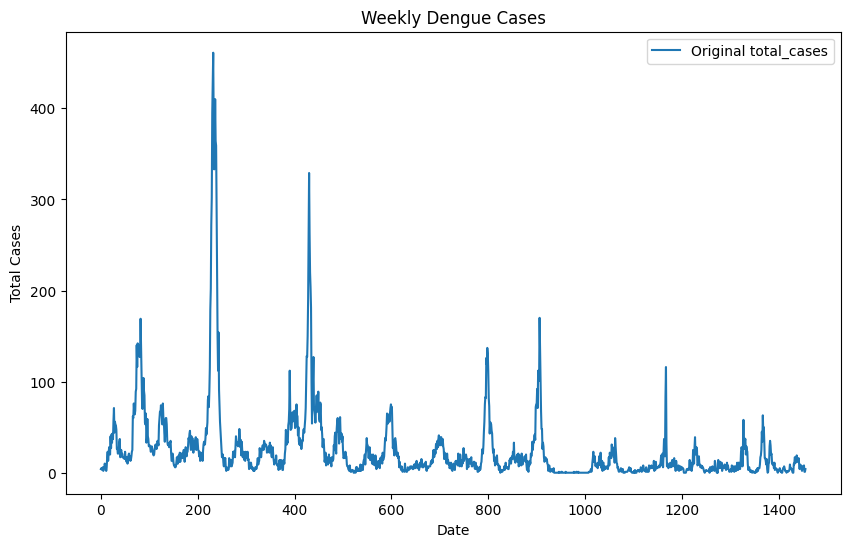

In [15]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['total_cases'], label='Original Data')
# plt.title('Original Time Series of Total Cases')
# plt.xlabel('Date')
# plt.ylabel('Total Cases')
# plt.legend()
# plt.show()
plt.figure(figsize=(10,6))
plt.plot(df['total_cases'], label='Original total_cases')
plt.title('Weekly Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [ ]:
from pmdarima.arima import auto_arima

# We use yearly seasonality on weekly data: m=52
model = auto_arima(
    df['total_cases'],
    seasonal=True,
    m=52,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=55.93 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=11325.856, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=11317.077, Time=10.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=11318.225, Time=9.91 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=11323.856, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=11316.318, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=11317.226, Time=10.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=22.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=11315.389, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=11316.276, Time=13.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=11316.404, Time=11.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=33.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=11317.083, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=11312.501, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=11313.620, Time=25.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=11313.718, Time=23.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=60.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=11310.504, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=11311.632, Time=16.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=11311.728, Time=16.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=45.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=11317.321, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=11312.501, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=11316.027, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=11314.503, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[52]             : AIC=11308.504, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52]             : AIC=11309.632, Time=3.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52]             : AIC=11309.728, Time=6.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52]             : AIC=inf, Time=24.78 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=11315.321, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[52]             : AIC=11314.318, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[52]             : AIC=11310.501, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[52]             : AIC=11310.501, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[52]             : AIC=11314.027, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[52]             : AIC=11313.389, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[52]             : AIC=11312.503, Time=0.34 sec

Best model:  ARIMA(1,1,1)(0,0,0)[52]          
Total fit time: 395.902 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1456
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5651.252
Date:                Fri, 18 Jul 2025   AIC                          11308.504
Time:                        05:05:56   BIC                          11324.353
Sample:                             0   HQIC                         11314.417
                               - 1456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7265      0.040     18.051      0.000       0

In [16]:
# cell 6: Split into train/test and fit on train

# If you have a date column, uncomment and adjust:
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

train_size = int(len(df) * 0.8)
train = df['total_cases'][:train_size]
test  = df['total_cases'][train_size:]

from pmdarima.arima import auto_arima

model = auto_arima(
    train,
    seasonal=True,
    m=52,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=52.58 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=9160.738, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=9147.968, Time=8.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=9150.677, Time=5.91 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=9158.744, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=9146.277, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=9147.998, Time=7.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=35.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=9138.478, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=9140.329, Time=8.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=9140.342, Time=9.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=42.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=9140.478, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=9140.477, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=9136.358, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=9138.264, Time=13.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=9138.272, Time=16.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=54.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=9148.964, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=9138.265, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=9139.380, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=9136.860, Time=1.66 sec
 ARIMA(1,1,1)(0,0,0)[52]             : AIC=9134.363, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52]             : AIC=9136.269, Time=3.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52]             : AIC=9136.277, Time=5.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52]             : AIC=inf, Time=32.40 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=9146.970, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[52]             : AIC=9144.283, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[52]             : AIC=9138.483, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[52]             : AIC=9136.270, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[52]             : AIC=9137.385, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[52]             : AIC=9136.483, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[52]             : AIC=9134.865, Time=2.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[52]          
Total fit time: 305.902 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1164
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4564.182
Date:                Fri, 18 Jul 2025   AIC                           9134.363
Time:                        06:41:14   BIC                           9149.539
Sample:                             0   HQIC                          9140.089
                               - 1164                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7265      0.035     20.915      0.000       0.

In [24]:
# cell 7: Forecast test period and future weeks

# Forecast the test set
n_test = len(test)
fc_test = model.predict(n_periods=n_test)
fc_test = pd.Series(fc_test, index=test.index)

# Ask user how many future weeks to predict
n_future = int(input("Enter number of future weeks to forecast: "))

# Forecast future
fc_future = model.predict(n_periods=n_future)

# Build an index for those future weeks:
last_idx = df.index[-1]
if isinstance(last_idx, pd.Timestamp):
    future_idx = pd.date_range(start=last_idx + pd.offsets.Week(1),
                               periods=n_future, freq='W')
else:
    future_idx = range(len(df), len(df) + n_future)

fc_future = pd.Series(fc_future, index=future_idx)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Enter number of future weeks to forecast: 800


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


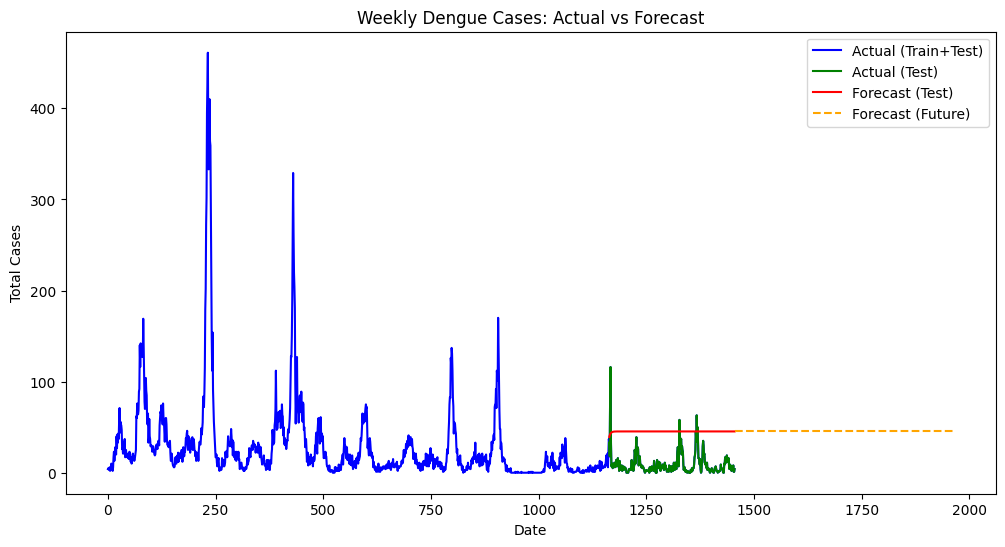

In [25]:
# cell 8: Plot actual, test, and forecasts

plt.figure(figsize=(12,6))
plt.plot(df['total_cases'],         label='Actual (Train+Test)',   color='blue')
plt.plot(test,                      label='Actual (Test)',         color='green')
plt.plot(fc_test,                   label='Forecast (Test)',       color='red')
plt.plot(fc_future, linestyle='--', label='Forecast (Future)',     color='orange')
plt.title('Weekly Dengue Cases: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [19]:
# cell 9: Compute error metrics on the test period

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse  = mean_squared_error(test, fc_test)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test, fc_test)
mape = np.mean(np.abs((test - fc_test) / test)) * 100

print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MSE:  1445.94
RMSE: 38.03
MAE:  36.85
MAPE: inf%


In [20]:
# Length of the dataset
n = len(df)

# Calculate 80% index
train_size = int(n * 0.8)

# Split into train and test
train = df['total_cases'][:train_size]
test = df['total_cases'][train_size:]

# Display the sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 1164, Test size: 292


In [21]:
# Refit the ARIMA model on train data only
# model = auto_arima(
#     train,
#     seasonal=True,
#     m=52,
#     stepwise=True,
#     suppress_warnings=True
# )

# Ask user for how many future weeks to forecast beyond test
future_weeks = int(input("Enter number of future weeks to forecast: "))

# Forecast for len(test) + future_weeks
n_periods = len(test) + future_weeks
forecast = model.predict(n_periods=n_periods)

# Create an index for full timeline (train + test + future)
full_index = np.arange(len(train) + n_periods)

# Actual + forecast
actual_data = pd.Series(df['total_cases'].values, index=np.arange(len(df)))
forecast_data = pd.Series(forecast, index=full_index[len(train):])


Enter number of future weeks to forecast: 100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


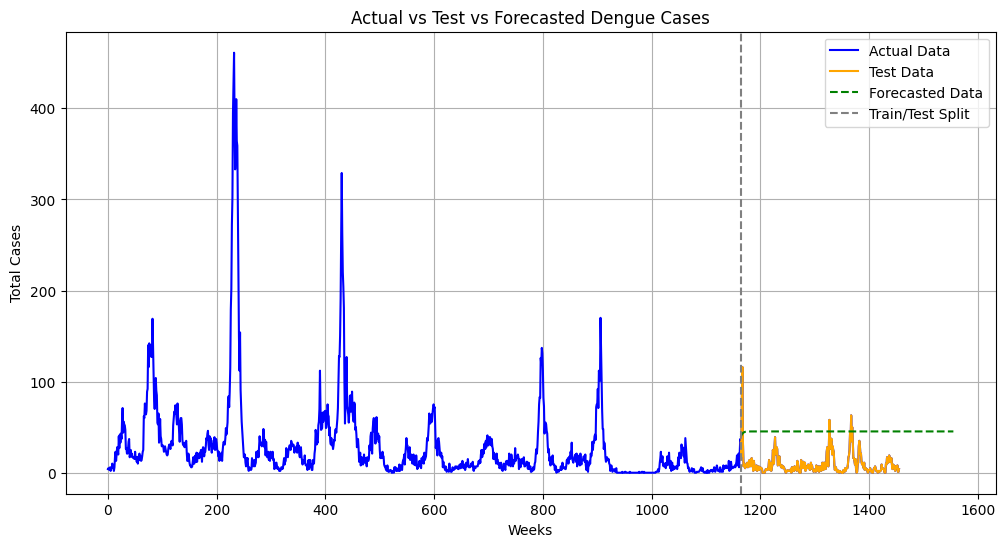

In [22]:
plt.figure(figsize=(12,6))

# Plot actual data
plt.plot(actual_data, label='Actual Data', color='blue')

# Plot test data
plt.plot(np.arange(len(train), len(train)+len(test)), test.values, label='Test Data', color='orange')

# Plot forecasted data
plt.plot(forecast_data.index, forecast_data.values, label='Forecasted Data', color='green', linestyle='--')

plt.axvline(len(train), color='gray', linestyle='--', label='Train/Test Split')

plt.title('Actual vs Test vs Forecasted Dengue Cases')
plt.xlabel('Weeks')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get only the forecasted values for the test period
forecast_for_test = forecast[:len(test)]

# Calculate errors
mse = mean_squared_error(test, forecast_for_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_for_test)

# Display
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 1445.94
Root Mean Squared Error (RMSE): 38.03
Mean Absolute Error (MAE): 36.85


In [ ]:
18-07-2025 Code

# **18-07-2025 Code**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and parse dates (replace path and column name if needed)
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')

# Convert date column to datetime (replace 'week_start_date' with your date column)
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Sort by date just in case
df = df.sort_values('week_start_date').reset_index(drop=True)

# Set date as index for easier plotting
df.set_index('week_start_date', inplace=True)

# Fill NaNs in numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Split 80/20 train-test
n = len(df)
train_size = int(n * 0.8)

train = df['total_cases'][:train_size]
test = df['total_cases'][train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 1164, Test size: 292


/tmp/ipython-input-64-2897034167.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['week_start_date'] = pd.to_datetime(df['week_start_date'])


NameError: name 'train' is not defined

In [ ]:
# Forecast for test period
n_periods_test = len(test)
forecast_test_values = model.predict(n_periods=n_periods_test)

# Index for test forecast
start_test_date = test.index[0]
forecast_test_index = pd.date_range(start=start_test_date, periods=n_periods_test, freq='W')
forecast_test_series = pd.Series(forecast_test_values, index=forecast_test_index)

# User input for future forecast
future_weeks = int(input("Enter number of future weeks to forecast: "))

# Forecast future period immediately after test
forecast_future_values = model.predict(n_periods=future_weeks)

# Index for future forecast
last_test_date = test.index[-1]
forecast_future_index = pd.date_range(start=last_test_date + pd.Timedelta(weeks=1), periods=future_weeks, freq='W')
forecast_future_series = pd.Series(forecast_future_values, index=forecast_future_index)

# Combine both forecasts
forecast_series = pd.concat([forecast_test_series, forecast_future_series])


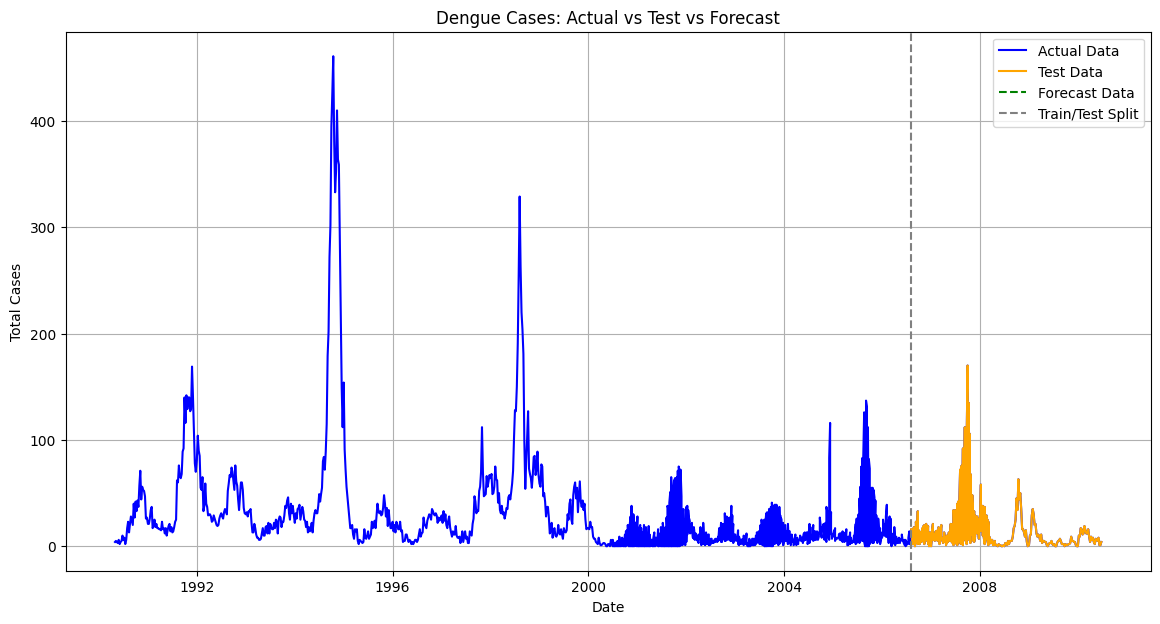

In [ ]:
plt.figure(figsize=(14,7))

plt.plot(df['total_cases'], label='Actual Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast Data', color='green', linestyle='--')

plt.axvline(test.index[0], color='gray', linestyle='--', label='Train/Test Split')

plt.title('Dengue Cases: Actual vs Test vs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd # Import pandas to use .isnull()

# Use the test and forecast series from the previous cell directly

# Ensure test and forecast_test_series have the same index and no NaNs before calculating metrics
test = test.dropna() # Drop any potential NaNs in test (though unlikely based on previous checks)
forecast_test_series = forecast_test_series.dropna() # Drop any potential NaNs in forecast_test_series

# Although not strictly necessary if previous steps were successful,
# aligning them explicitly can help prevent issues if indices are slightly off.
# However, since we created forecast_test_series with test.index explicitly,
# this alignment step might be redundant, but let's keep it for robustness.
test_aligned, forecast_aligned = test.align(forecast_test_series, join='inner')


# Add a check for NaN values after alignment
print(f"NaNs in test_aligned: {test_aligned.isnull().sum()}")
print(f"NaNs in forecast_aligned: {forecast_aligned.isnull().sum()}")


# Only evaluate forecast on test period using the aligned series
mse = mean_squared_error(test_aligned, forecast_aligned)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_aligned, forecast_aligned)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

NameError: name 'test' is not defined

# **Second code ARIMA**

In [ ]:
# Cell 1: Imports and Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import pmdarima
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 4)

In [ ]:
# Cell 2: Load the single CSV (features + labels)
# Replace 'dengue_all.csv' with your filename
df = pd.read_csv('/content/sample_data/data (8).csv')

In [ ]:
# Cell 3: Parse dates, sort, and split train/test by missing target
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df = df.sort_values(['city','week_start_date'])

train = df[df['total_cases'].notna()].copy()
test  = df[df['total_cases'].isna()].copy()

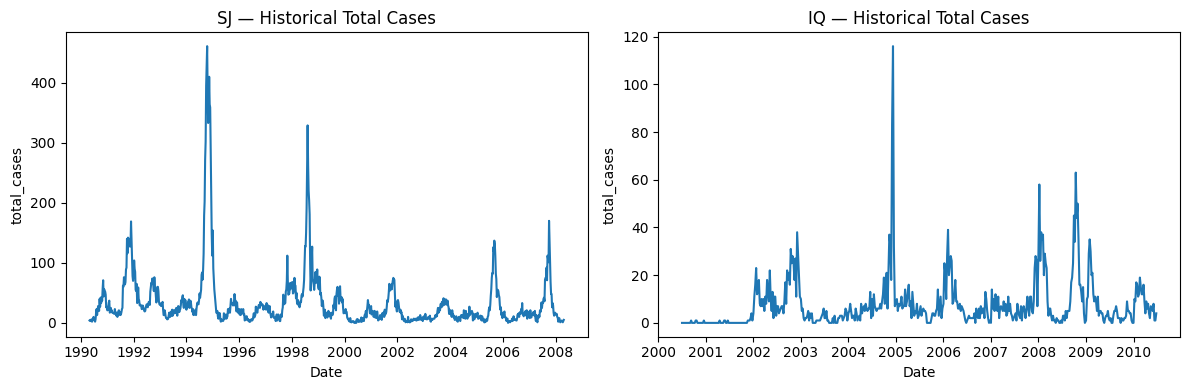

In [ ]:
# Cell 4: Plot the historical (train) counts for each city
fig, ax = plt.subplots(1, 2)

for i, city in enumerate(['sj','iq']):
    series = train[train.city==city].set_index('week_start_date')['total_cases']
    ax[i].plot(series.index, series.values, color='C0')
    ax[i].set_title(f'{city.upper()} — Historical Total Cases')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('total_cases')
plt.tight_layout()
plt.show()

In [ ]:
# Cell 5: Prepare per-city series and test indices
train_sj = train[train.city=='sj'].set_index('week_start_date')['total_cases']
test_sj_idx = test[test.city=='sj'].set_index('week_start_date').index

train_iq = train[train.city=='iq'].set_index('week_start_date')['total_cases']
test_iq_idx = test[test.city=='iq'].set_index('week_start_date').index

In [ ]:
# Cell 6: Define auto_arima + Forecast Helper
def fit_forecast_auto(series, idx, m=52):
    """
    1) auto_arima to select orders
    2) fit SARIMAX on chosen orders
    3) forecast for idx
    """
    stepwise = auto_arima(
        series,
        seasonal=True,
        m=m,
        trace=False,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
    order, seasonal_order = stepwise.order, stepwise.seasonal_order

    model  = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)

    return result.predict(start=idx[0], end=idx[-1])

In [ ]:
# Cell 7: Forecast Each City with auto_arima
# San Juan forecast
fcst_sj = fit_forecast_auto(train_sj, test_sj_idx, m=52)
test.loc[test.city=='sj', 'forecast'] = fcst_sj.values

# Iquitos forecast
fcst_iq = fit_forecast_auto(train_iq, test_iq_idx, m=52)
test.loc[test.city=='iq', 'forecast'] = fcst_iq.values

IndexError: index 0 is out of bounds for axis 0 with size 0

NameError: name 'forecast_df' is not defined

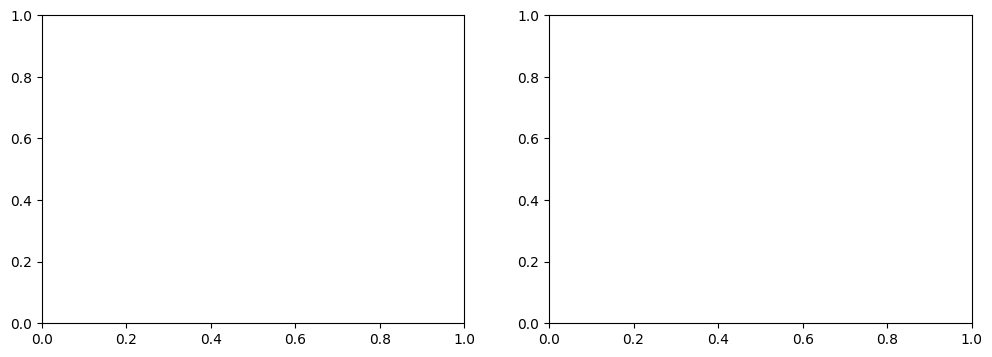

In [ ]:
# Cell 8: Plot Train / Test / Forecast Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, city in enumerate(['sj','iq']):
    if city == 'sj':
        train_series = train_sj_split
        test_series = test_sj_split
        forecast_series = forecast_df.loc[test_sj_idx, 'forecast']
        city_label = 'SJ'
    else:
        train_series = train_iq_split
        test_series = test_iq_split
        forecast_series = forecast_df.loc[test_iq_idx, 'forecast']
        city_label = 'IQ'

    axes[i].plot(train_series.index,    train_series.values,    color='C0', label='Train (actual)')
    axes[i].plot(test_series.index,test_series.values, color='C1', label='Test (actual)')
    axes[i].plot(forecast_series.index,  forecast_series.values,  color='C2', label='Forecast')
    axes[i].set_title(f'{city_label} — Actual vs Forecast')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('total_cases')
    axes[i].legend()

plt.tight_layout()
plt.show()

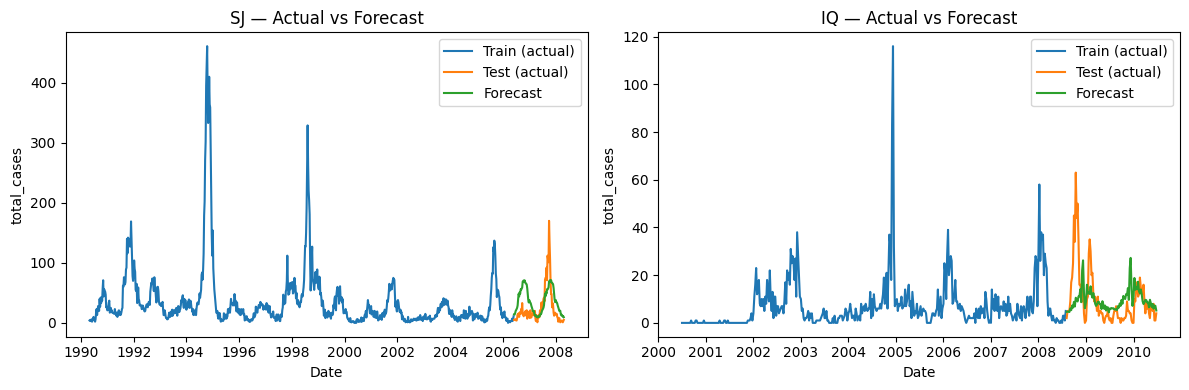

In [ ]:
# Combine code from cell sphtlwTHBeWg and DyJPhh73BeY7

# Cell 7: Define a simple SARIMAX fit & forecast helper
def fit_forecast(train_series, test_series, order=(1,1,1), seasonal_order=(1,1,1,52)):
    model  = SARIMAX(train_series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)

    # Use integer locations based on the lengths of train and test series
    start_loc = len(train_series)
    end_loc = len(train_series) + len(test_series) - 1

    # predict gives us both in-sample and out-of-sample; here start=first test idx
    return result.predict(start=start_loc, end=end_loc)

# Cell 8: Split data into train and test sets for each city based on a date
# Let's choose a split date, for example, the last 100 weeks for testing
split_date_sj = train_sj.index[-100]
train_sj_split = train_sj[train_sj.index <= split_date_sj]
test_sj_split = train_sj[train_sj.index > split_date_sj]
test_sj_idx = test_sj_split.index


split_date_iq = train_iq.index[-100]
train_iq_split = train_iq[train_iq.index <= split_date_iq]
test_iq_split = train_iq[train_iq.index > split_date_iq]
test_iq_idx = test_iq_split.index


# Cell 9: Fit & forecast for both cities using the split data
order           = (1,1,1)
seasonal_order  = (1,1,1,52)

# Pass both train_series_split and test_series_split to fit_forecast
fcst_sj = fit_forecast(train_sj_split, test_sj_split, order, seasonal_order)
fcst_iq = fit_forecast(train_iq_split, test_iq_split, order, seasonal_order)

# Create a new DataFrame for forecasts to avoid modifying the original test DataFrame
forecast_df = pd.DataFrame(index=test_sj_idx.union(test_iq_idx))
forecast_df['forecast'] = np.nan # Initialize with NaN

# Attach forecasts into the new forecast DataFrame
forecast_df.loc[test_sj_idx,  'forecast'] = fcst_sj.values
forecast_df.loc[test_iq_idx,  'forecast'] = fcst_iq.values

# Cell 10: Plot Train / Test / Forecast Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, city in enumerate(['sj','iq']):
    if city == 'sj':
        train_series = train_sj_split
        test_series = test_sj_split
        forecast_series = forecast_df.loc[test_sj_idx, 'forecast']
        city_label = 'SJ'
    else:
        train_series = train_iq_split
        test_series = test_iq_split
        forecast_series = forecast_df.loc[test_iq_idx, 'forecast']
        city_label = 'IQ'

    axes[i].plot(train_series.index,    train_series.values,    color='C0', label='Train (actual)')
    axes[i].plot(test_series.index,test_series.values, color='C1', label='Test (actual)')
    axes[i].plot(forecast_series.index,  forecast_series.values,  color='C2', label='Forecast')
    axes[i].set_title(f'{city_label} — Actual vs Forecast')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('total_cases')
    axes[i].legend()

plt.tight_layout()
plt.show()